## Zusammenfassung

Diese Arbeit beschäftigt sich mit Transportnetzen und deren Robustness und fokussiert sich dabei auf die Aussage vom Winer und Randic Index nach Ausfällen. Das schweizer Bahnnetz wird als Netzwerkgraph abgebildet damit so mit verschiedenen Szenarien Ausfälle simulieren werden können. Bahnhöfe gelten als Knoten und Verbindungen zwischen zwei Stationen als Kanten. Der Graph ist ungerichtet und schleifenlos. Nach den Ausfällen werden die Robustheitsmasse von Milan Randic und Harry Wiener angewendet. Der Test umfasst einen Verlust von 20% der Knoten im Netzt. Nach den Ausfällen bilden sich unterschiedlich viele Cluster, die ein Indiz auf die Ausmasse der Störung indizieren. Es wird aufgezeigt, dass sich die beiden Algorithmen für zufällige Ausfälle im Netz kaum unterscheiden. Bei gezielten Ausfällen ist jedoch ein signifikanter Unterschied messbar. Gezielte Ausfälle zielen auf Knoten welche den höchten betweenness centraliy Index aufweisen.


## Abstract

This Paper is about transport networks and their robustness. It focuses on the statements made by Winer and Randic Index after failures. The Swiss rail network is mapped as a network graph. With that, failures can be simulated with different scenarios. Train stations are considered nodes and connections between two stations represent the edges. The graph is undirected and without loops. After the failures, the robustness measures from Milan Randic and Harry Wiener are applied. The test includes a loss of 20% of the nodes in the network. After the failures different number of clusters are formed, which give an indication of the extent of the disturbance. It is shown that the two algorithms for random failures in the network hardly differ. In case of targeted failures, however, a significant difference can be measured. Targeted failures implies nodes that have the highest betweenness centraliy index.

# Ausgangslage

Das Schweizer Schienennetz besteht aus Bahnhöfen und Gleisen, die ein Netz für verschiedene Zugstreckenanbieter bilden. Dabei erstrecken sich die Verbindungen über die Landesgrenzen hinaus. Durch diese Vernetzung ist das Schweizer Netz am europäischen Netz angeschlossen. Die Analyse in diesem Paper bezieht sich nur auf die Verbindungen innerhalb der Schweiz. Wenn die Verbindung zwischen zwei Bahnhöfen das Land verlässt, gelten die Bahnhöfe vor der Grenze noch als Komponente des Schweizer Netz. Bahnhöfe werden als Knoten und Verbindungsstrecken via Gleis als Kanten betrachtet. Beim resultierenden Datensatz handelt es sich um ein Transportnetz. Der Graph ist ungewichtet und ungerichtet. Die Analyse bezieht sich darauf, mit Hilfe von Graphen theoretischen Eigenschaften, Ausfälle der Knoten analysieren zu können. Dabei werden zwei spezifische Graph Algorithmen gegenübergestellt. Der Radić Index und der Wiener Index. Beide werden für die Bezeichnung von Robustheit von Scale-Free Netzen eingesetzt.  Es soll untersucht werden, wie sich die Aussagekraft der beiden Algorithmen in unterschiedlichen Szenarien bei Ausfällen des Netzes, unterscheidet. Unterschiedliche Szenarien können gezielte oder zufällige Verluste von Knoten sein. Dabei ist ein gezielter Ausfall, der Verlust eines Knoten eines spezifischen Verbindungspunkt. Ein solcher Verbindungsknotek kann ein zentraler Bahnhof darstellen. Dabei werden Bahnhöfe nach Wichtigkeit eingestuft. Dafür kann ein globales Zentralitätsmass verwendet werden. Ein Knoten mit einem hohen betweenness Centrality Index wird beispielsweise als wichtig eingestuft, da er sehr viele weitere Bahnhöfe verbindet. Diesem Szenario gegenübergestellt werden zufällige Ausfälle. Das ist ein Verlust eines Knoten, unabhängig von dessen Wichtigkeit.

# Algorithmen für die Robustheit von Transportnetzen
Die Graphentheorie wurde bereits oft angewendet für die strukturelle Analyse von Transportnetzen wo Railway Systeme, Subway Netzwerke, Bus Netze und Flugverkehr dazu gehörten [2]. Sen et al. [3] hat als erstes die indischen Transportnetze mithilfe der Graphentheorie analysiert. Dabei hat man die Small-World Eigenschaft der Netze festgestellt. Daraufhin wurden weitere Analysen von Zugsystemen global durchgeführt. Die small-worldness Eigenschaft zeichnet ein Graph dadurch aus, dass er eine kurze durchschnittliche Pfadlänge besitzt. Das bedeutet in einem Transportnetzt, dass die Verbindung zwischen Knoten A und B über nicht viele weitere Knoten führt. Die Robustheit eines Graphen als globales Mass, kann durch den Randix Index [4] berechnet werden. Die Robustheit bedeutet, die Verbundenheit des Graphen nach dem Verlust eines verbindenden Knoten. Der Wiener Index quantisiert die Verbundenheit der Knoten im Netz und führt zu einem weiteren Robustheitsindex [5].
Es wurde bereits erkannt, dass sich die beiden Robustness Indexe Randic und Wiener grundlegend unterscheiden. Der Wiener Index ist linear wobei der Randic Index ist nichtlinear und nichtkonvex ist [6].


## Datensatz und GeoJSON

Als erstes wird der Datensatz für die Analyse vorbereitet. Die Öffentliche Verkehrsbetriebe stellen die Abfahrts und Ankunftsdaten der Verkehrsmittel via opentransportdata.swiss [7] zur Verfügung. Darin sind alle Verbindungen mit öffentlichen Verkehrsmittel abgebildet. 
Um diese Daten auf die Schweiz zu begrenzen wird ein GeoJSON mit den Polygondaten der Schweizer Grenzen benötigt. Damit können alle Verkehrsmittel, die sich innerhalb der Schweiz befinden, gefiltert werden [8]. Aus dem resultierenden Datensatz werden nur die Langstreckenzüge beachtet und keine S-Bahnen. Dieser GeoJSON Datensatz befindet sich frei verfügbar auf einem Git Repository.
GeoJSON ist ein offenes Standardformat zur Darstellung einfacher geografischer Merkmale. Um in Python damit arbeiten zu können wird das GeoJSON File in ein Geopandas Datensatz eingelesen.

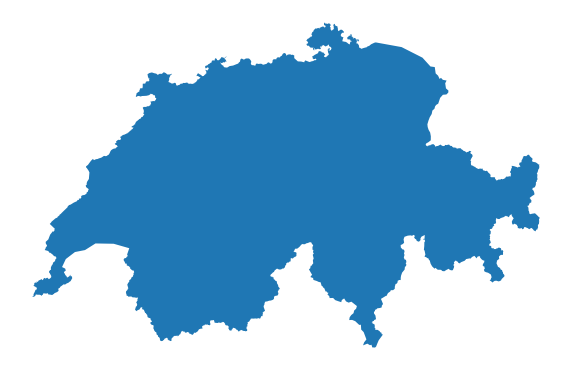

In [37]:
show_geojson()

Folgend ein Einblick in das GeoJSON Dataframe.

In [38]:
df_ch.head()

,geometry
0,"POLYGON ((7.20034 45.87567, 7.20360 45.87686, ..."


Nun sind die nötigen Daten vorhanden um die Abgrenzung zur Schweiz durchführen zu können.

## Datenbereinigung

Um die einzelnen Stops und Verbindungen in der Schweiz zu erhalten verwenden wir als Grundlage die Daten von opentransportdata.swiss
Die Fahrplaninformationen werden öffentlich zur verfügung gestellt. Dafür wird ein Austasuchformat, welches von Google entwickelt wurde und sicht als Standard etabliert hat, verwendet. Das General Transit Feed Specification (GTFS) ist ein Format für geografische Informationen und Fahrpläne des öffentlichen Personenverkehrs. Darin sind Standorte und Haltestellen abgebildet. Weiter auch die Verkehrsrouten und die dazugehörige Ankunfts und Abfahrtszeiten eines spezifischen Tages. Transportunternehmen stellen diese Daten auf der Open-Data Plattform ÖV-Schweiz zur Verfügung. Diese Daten werden sehr oft als Grundlage für Applikationen verwendet. Auf der folgenden Abbildung ist eine Übersicht über die relationale Struktur des Datensatzes ersichtlich.

![title](images/gtfs_static.png)

In der Tabelle Stops sind alle Haltestellen der schweizer öv-Verbindungen enthalten. Die Informationen zu längen und Breitengraden können ausgelesen werden und mit Geopandas als Plot visualisisert werden. Mit einer sjoin Funktion wird berechnet, welche der Haltestellen sich innerhalb des schweizer GeoJSON Datensatzes befinden. Für die Datenbearbeitung mit der Longitude und Latitude, müssen wir die gemoetry Spalte vom Type GeoSeries im Dataframe hinzufügen. Mit dem Attribut crs (Coordinate Reference Systems) definieren wir den Ursprung des Koordinatensystems Mit der Berechnung, welche der Stops in der Schweiz liegen erhalten wir einen Datensatz, der alle öffentlichen verkehrsmittel der Schweiz abdeckt. 
Auf dem folgenden Plot ist blau ersichtlich, wo sich die Haltestellen befindet und in Oranger Farbe die resultierende Schnittmenge. Die Struktur der schweizer Landesgrenzen wird somit direkt erkennbar.

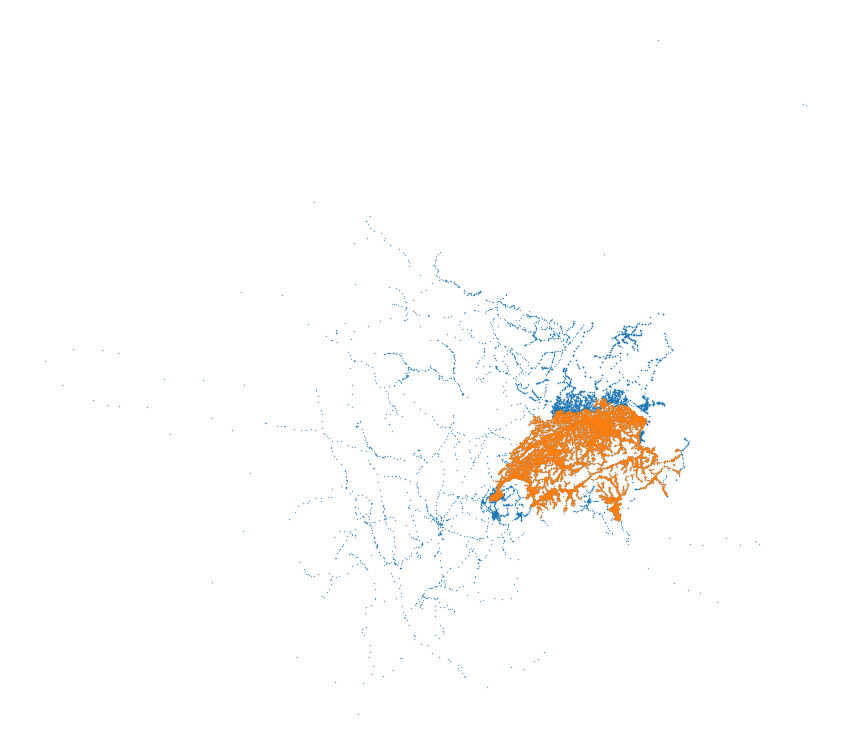

In [39]:
show_transportdata()

Um die strecken zwischen den Bahnhöfen abbildne zu können, wird aus dem Datensatz die Tabelle route, trips, stoptime und stop benötigt. Aus der Kombination dieser Tabellen können die Kanten für den Graph erstellt werden. Mit Python und Pandas werden die Tabellen anhand ihres Primär und Fremdschlüssel ge merged. So entsteht eine Tabelle, die alle nötigen Informationen enthält. Der resultierende Datensatzw wird nun auf die InterCity und InterRegio Zugverbindungen gefiltert. 

| Beschreibung | Route_Type |
| --- | --- |
| InterCity | 102 | 
| InterRegio | 103 |


So ist der Datensatz für die weitere Analyse vorbereitet. Es existiert nun ein Datensatz mit allen InterCity und InterRegio Verbindungen innerhalb des schweizer Netzes. Die Zugstrecken sind mit Kanten verbunden und die Bahnhöfe bilden die Knoten des Graphen.

## Analyse
In der Analyse wird ein Gezielter Ausfall der Hauptbahnhöfe durchgeführt und erklärt, was dies für einen Netzwerkgraph bedeutet. Mittels einer Simulation werden die Daten empirisch gewonnen und für beide Algorithmen ausgewertet. Weiter wird mit einem zufälligen Ausfall dasselbe Experiment durchgeführt.

### Darstellung als Graph

Als erstes erstellen wir aus dem vorhandenen Datensatz ein Netzwerkgraph. Dabei entsteht ein schlingenloser ungericheter Graph. Der Graph ist ungerichtet, da die Züge zwischen den Bahnhöfen in beide richtungen fahren können. Die Bahhöfe bilden die Knoten und die Schienenverbindungen zwischen zwei Bahnhöfen die Kanten. Mit der Python Library Networkx werden die Daten eingelesen und als Plot dargestellt. Der resultierende Graph sieht wie folgt aus:

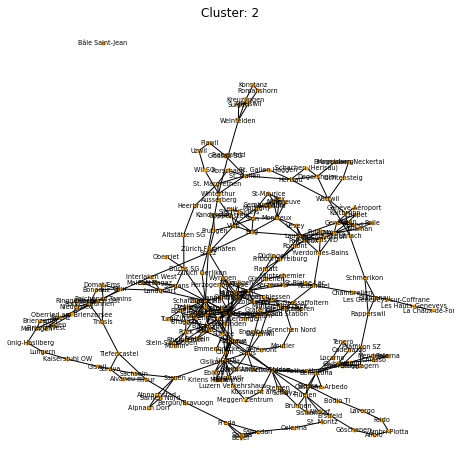

In [40]:
get_graph(G,8)

### Anwendung der Algorithmen

Als Algorithmen werden der Randic index und der Wiener Index als globale Graph Masse angewendet. Diese Beiden Masse bezeichnen die Robustness. Als Robustness wird die Fehleranfälligkeit eines Netzes bezeichnet. Mit diesem globalen Graphmass kann der Datensatz auf diese spezifische Eigenschaft beschrieben werden. Um die geplanten Berechnung mit den Algorithmen durchführen zu können muss die Scale-Free Eigenschaft des resultierenden Graphen geprüft werden. Diese wird abgeleitet durch die Small-World Eigenschaft, welche durch Interpretation der Knoten Grad Verteilung definiert wird. Der Knotengrad ist die Summe aller verbundenen Kanten des Knoten. Auf dem Folgenden Plot ist ersichtlich, dass wenige Knoten mit einem hohen Grad und viele Knoten mit einem kleinen Grad im Graphen vorhande sind. [i6]

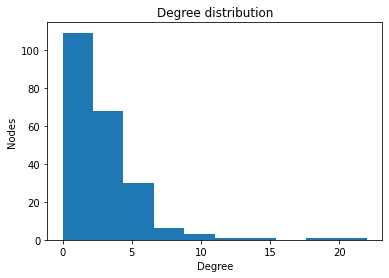

In [41]:
get_degreedist()

Diese Degree distribution zeigt bereits auf, dass das Netz anfällig auf Ausfälle der Knoten mit einem hohen Grad haben. Dem entgegengesetzt, existieren einige Knoten mit einem kleinen Grad, deren Ausfälle das Netz weniger beeinflussen werden.

## Randic Index

Der Ranidc Index wird in der Chemie oft für die Analyse von Mollekularstrukturen verwendet. Er gilt als der erste Knotengrad basierte Topologieindex der Graphentheorie und wurde 1975 von Milan Randic veröffentlicht. Der Index wird wie folgt definiert:


$R(G) = \displaystyle\sum_{\{u,v\}V(G)}\frac{1}{\sqrt{d(u_j)d(v_j)}}$ 

Wobei $d(u_j)$ der Grad des Knoten $u$ ist und $d(v_j)$, der Knotengrad des Knoten v. Vom Produkt dieser zwei Werte wird die Wurzel gezogen. Das bedeutet, die Summe von 1 über der multiplizierten Wurzel der Knoten Grade von Ursprung und Zielbahnhof. Somit wird das gewicht der direkt verbundenen Knoten in den Index direkt miteinbezogen.


In [42]:
# Randic Index
import numpy as np
print("Randic Index:", get_randicindex(G))

Randic Index: 204.75264979958058


## Wiener Index

Der von Harry Wiener im Jahr 1947 entworferne Topologieindex ist einer der ersten Indexe, der die Robustheit eines Graphen beschreibt. Er wurde auch primär für den Einsatz in der Molekularbiologie entwickelt. Er ist wie folgt definiert:

$W(G) = \frac{1}{2} * \displaystyle\sum_{\{u,v\}V(G)}d(v,u)$

Wobei $d(v,u)$ der kürzeste Pfad zwischen $v$ und $u$ ist. Der Wiener Index summiert alle kürzeste Pfade zwischen zwei Knoten im Netz und führt so zu einem globalen Robustheitsindex.


In [43]:
# Wiener Index
print("Wiener Index: ", get_wienerindex(G))

Wiener Index:  157765.0


### Gezielte Ausfälle
Unter gezielten Ausfällen versteht man beispielsweise einen absichtlichen Angriff auf einen Bahnhof. Dabei wird anhand von spezifischen Eigenschaften ausgewählt welcher Knoten angegriffen werden soll. Beispielsweise kann das der Knoten sein mit den meisten traversierenden Zügen, oder derjenige, der direkt mit den meisten weiteren Bahnhöfen verbunden ist. Ein Schienennetz wird am meisten gestöhrt, wenn der Knoten entfernt wird bei dem die Züge einmal vorbei fahren müssen. Um diese Situation abzubilden, wird eine Liste erstellt mit der Betweenness Centrality und in absteigender Reihenfolge sortiert. Dises Mass repräsentiert die Eigenschaft, mit den am meisten traversierenden Routen pro Knoten. Der Knoten mit dem grössten Wert wird entfernt und hat somit einen Impact auf den Graphen. Durch den Ausfall eines Knoten wird der komplette Graph beeinflusst und die bereits erstellte Liste ist nicht mehr für dieses Vorhaben gültig. Daher wird nach jedem Ausfall die Liste neu berechnet.


### Zufällige Ausfälle

Zufällige Ausfälle in einem Graphen bedeuten, dass ohne Rücksicht auf die Wichtigkeit oder die Zentralität eines Knoten solche entfernt werden. Durch eine Random Library in Python wird zufällig ein Knoten ausgewählt, der entfernt wird. Wir können bereits jetzt davon aus gehen, dass zufällige Knotenausfälle nicht dieselbe Wirkung haben wie gezielte Ausfälle. Ein Skalenfreies Netzwerk ist auf solche Ausfälle nicht sehr anfällig. Durch eine Phyton Funktion wurden 20% aller vorhandenen Knoten in der einer zufälligen Reihenfolge entfernt. Jeweils wenn ein Knoten entfernt wird, wird werden die beiden Algorithmen auf den gesamten Graphen angewendet. Dadurch ergibt sich ein Datensatz mit $0.2* v(G)$ Werten. Weiter wird dasselbe für gezielte Ausfälle simuliert. Vom ursprünglichen kompletten Graphen werden nacheinander die Knoten mit der höchsten betweenness Centrality entfernt. Bei der Auswertung im Plot ist direkt ersichtlich, wie sich der Wert des Graphmass im Zusammenhang mit den verschiedenen Szenarien verhält. Folgend der Graph für den Wiener index mit Zufälligen und gezielten Ausfällen.

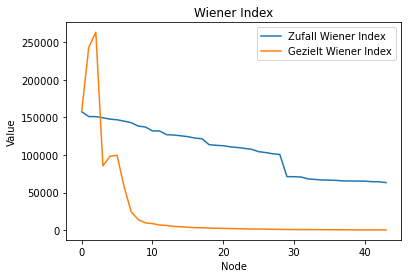

In [44]:
get_wienerchart()

Wie für die Berechnung mit dem Wiener Index wird dasselbe Szenario von zufälligen Ausfällen sowie gezielten Ausfällen auch für den Randic Index wiederhohlt. Ersichtlich ist der enge Zusammenhang zwischen zufälligen und gezielten Ausfällen. Die beiden Linien im Graphen weichen kaum voneinander ab.

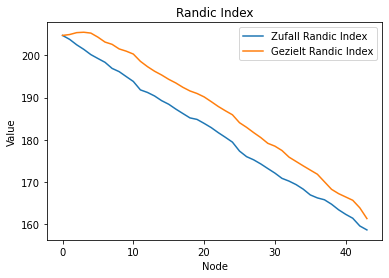

In [45]:
get_randicchart()

Der resultierende Graph aus der Simulation mit zufälligen Ausfällen sieht wie folgt aus. Im Titel ist ersichtlich wie viele Cluster sich bereits nach diesen Ausfällen gebildet haben.

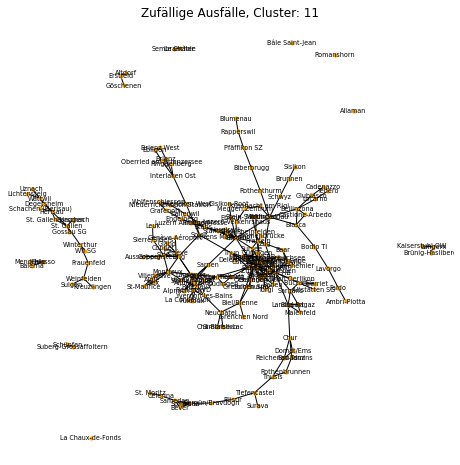

In [46]:
get_graph(R,8,'Zufällige Ausfälle, ')

Der resultierende Graph aus der Simulation mit gezielten Ausfällen sieht wie folgt aus. Im Titel ist ersichtlich wie viele Cluster sich bereits nach diesen Ausfällen gebildet haben.

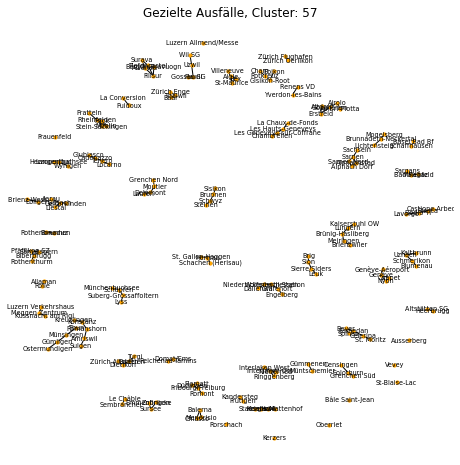

In [47]:
get_graph(P,8,'Gezielte Ausfälle, ')

Aus dieser visualisiserung kann bereits abgeleitet werden, dass die gezielten Ausfälle einen markant grösseren Einfluss auf den Graphen gehabt haben.

## Korrelation von globalen Graphmassen

Um eine Aussage über den Zusammenhang oder die Abweichung der beiden Indexe treffen zu können, verwenden wir den Korrelationskoeffizient. Der Korrelationskoeffizient, ist ein Maß für den Grad des linearen Zusammenhangs zwischen zwei Merkmalen. Er kann Werte zwischen -1 und +1 annehmen. Bei einem Wert von 1 besteht ein vollständig positiver, oder bei -1 negativer linearer Zusammenhang zwischen den betrachteten Merkmalen. Wenn der Korrelationskoeffizient den Wert 0 aufweist, hängen die beiden Merkmale überhaupt nicht linear voneinander ab. Der Korrelationskoeffizient ist wie folgt definiert:

$$ r = \frac{\sum{(x_i-\overline{x})(y_i-\overline{y})}} {\sqrt{\sum{(x_i-\overline{x})^2}\sum{(y_i-\overline{y})^2}}} $$

Wobei $\overline{x}$ und $\overline{y}$ jeweils der Mittelwert des Datensatz und $x_i$ sowie $y_i$ die aktuelle Messgrösse ist. Die Summe der multiplizierten Standardabweichung wird über der jeweiligen Wurzel der Varainz der beiden Datenstäze gerechnet.


## Korrelation von Wiener und Randic

Dafür wird der Korrelationkoeffizient verwendet.Um das Verhältnis der beiden Funktionen auf einem Plot abzubilden, werden die beiden Datensätze normalisiert. 

In [48]:
print(p_wiener)

[157765.0, 243267.0, 263418.0, 85666.0, 98338.0, 99708.0, 57525.0, 24316.0, 14052.0, 9716.0, 8786.0, 6939.0, 6272.0, 5107.0, 4541.0, 3940.0, 3379.0, 3185.0, 2841.0, 2601.0, 2450.0, 2278.0, 2002.0, 1806.0, 1636.0, 1504.0, 1378.0, 1210.0, 1075.0, 961.0, 919.0, 844.0, 801.0, 741.0, 681.0, 628.0, 632.0, 567.0, 522.0, 482.0, 449.0, 416.0, 399.0, 382.0]


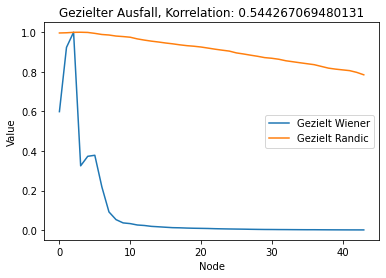

In [49]:
get_gezkorrelation()

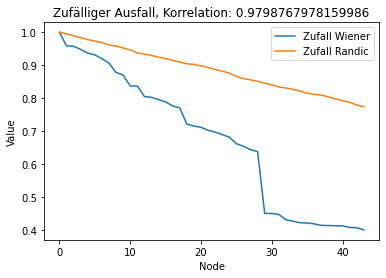

In [50]:
get_randkorrelation()

# Conclusion

Durch eine Analyse des Datensatzes und der auswirkung von gezielten und zufälligen Ausfällen haben wir eine unterscheidung der beiden Indexe für die globale Grapheigenschaft der Robustness gesehen. Bereits bei der Berechnung der anzahl Cluster nach den simulierten Ausfällen zeigt sich, dass bei gezielten Ausfällen der Schaden für ein Netz viel grösser ist als bei zufälligen Ausfällen. Folgende Tabelle zeigt eine Übersicht:

In [51]:
get_outagestats()


Dadurch lässt sich ableiten, dass gezielte Ausfälle einen stärkeren Einfluss auf das Transportnetz haben. Der Grund liegt darin, dass bei gezielten Ausfällen die wichtigen Verbindungsknoten als erstes ausfallen wobei bei zufälligen Ausfällen jeder Knoten mit derselben Warscheinlichkeit ausfällt.

Bei den berechneten Algorithmen fällt auf, dass der Wiener Index wird massiver bei Störungen im Graph beeinflusst als der Randic Index. Wir haben durch die Berechnung des Korrelationskoeffizient gesehen, dass die beiden Indexe im Szenario der gezielten Ausfälle mit dem Wert von 0.424 kaum eine Korrelation aufweisen. Korrelationswerte unterhalb von 0.5 werden als schwach Korrelierend bezeichnet. Andererseits ist die Korrelation im Szenario von zufälligen Ausfällen einiges höher. Bei diesem Szenario wird einen Wert von 0.939 Korrelation gemessen.
Mit dieser Analyse hat sich aufgezeigt, dass der Wiener index für eine Analyse der Robustness in Transportnetze eine genauere Aussage über den Zustand des Netzes geben kann. Der Randic Index im Vergleich zeichnet eine nahezu lineare Funktion, währenddem das Szenario durchegeführt wurde.

Als weitere Analyse könnte speziell der Unterschied von Random Ausfällen mit gezielten Ausfällen im Detail beleuchtet werden. Dort ist die Frage offen warum sich diese beiden Szenarien markant unterscheiden. Auch kann diese Arbeit als Grundlage verwenet werden, um schwache Stellen in einem Transportnetz zu detektieren und mögliche Konsequenzen dafür zu berechnen. Des weiteren wurde nur Licht auf zwei verschiedene Ausfallszenarien geworfen. Es existieren weitere Szenarien die auf diesen oder einen ähnlichen Datensatz angewendet werden können. Zudem können weitere globale Graphmasse berechnet werden um noch einen genaueren Einblick in den Datensatz zu erhalten. Diese Arbeit fokusiert sich auf Transportnetze im speziellen Fall der Schweizer Transportnetze. In der Graphentheorie existieren einige weitere Graphentypen die auch mit demselben vorgehen analysiert werden können.

In [52]:
import pandas
import random
import geopandas
import numpy as np
from pyproj import CRS
from scipy import stats
import matplotlib.pyplot as plt
from shapely.geometry import Point
from networkx import nx
from IPython.display import HTML


# Data Aggregation Part

# Read all Data from GTFS Dataset
df_stopstime = pandas.read_csv('gtfs_fp2021_2021-04-14_09-10/stop_times.txt',low_memory=False)
df_routes = pandas.read_csv('gtfs_fp2021_2021-04-14_09-10/routes.txt')
df_trips = pandas.read_csv('gtfs_fp2021_2021-04-14_09-10/trips.txt')
df_stops = pandas.read_csv('stops.txt')

# Convert to Dataframe and Add CRS to set 0 point of the Map

df_stops = geopandas.GeoDataFrame(df_stops, geometry=geopandas.points_from_xy(df_stops.stop_lon, df_stops.stop_lat))
df_stops.crs = CRS('epsg:4326') 

# Join the GeoJSON of the Swiss Map with the Stops of the Dataset
df_stops_ch = geopandas.sjoin(df_stops, df_ch)

# Filter only InterCity and InterRegio
df_routes_filtered = df_routes.query('route_type == [102,103]')

# Join the Datasets together
routes_trips = pandas.merge(df_routes_filtered,df_trips,on='route_id')
routes_trips_stoptime = pandas.merge(routes_trips, df_stopstime,on='trip_id')
routes_trips_stoptime_stop = pandas.merge(routes_trips_stoptime, df_stops_ch,on='stop_id')


# Remove duplicate entries
stops_ch_unique = routes_trips_stoptime_stop.drop_duplicates('stop_name')
route_ch_unique = routes_trips_stoptime_stop.drop_duplicates(subset=['stop_id'])
routes_trips_stoptime_stop.to_csv(r'routes_trips_stoptime_stop.csv', index = False)


#Generating the Graph from the Pandas DataFrame
import networkx as nx
G = nx.Graph()
for name, group in routes_trips_stoptime_stop.groupby('trip_id'):
    n = False
    for row_index, row in group.sort_values(by='stop_sequence').iterrows():
        if(n !=False):
            G.add_edge(row.stop_name,n)
        G.add_node(row.stop_name)
        n = row.stop_name  

# Creates a Copy of the origin Graph and runs the Function to remove Nodes based on betweenness centrality
P = G.copy()
p_wiener = []
p_randic = []
for _ in  range(int(P.number_of_nodes()*0.2)):
    p_wiener.append(get_wienerindex(P))
    p_randic.append(get_randicindex(P))
    P.remove_nodes_from(get_betweenness_centrality_list(P,1))
    
# Creates a Copy of the origin Graph and runs the Function to randomly remove Nodes

R = G.copy()
r_wiener = []
r_randic = []
for _ in  range(int(R.number_of_nodes()*0.2)):
    r_wiener.append(get_wienerindex(R))
    r_randic.append(get_randicindex(R))
    R.remove_nodes_from(get_random_nodes(R,1))
        
        
# Function for Text Part

def get_wienerchart():
    plt.title("Wiener Index")
    plt.xlabel('Node')
    plt.ylabel('Value')
    plt.plot(r_wiener, label = "Zufall Wiener Index")
    plt.plot(p_wiener, label = "Gezielt Wiener Index")
    plt.legend()
    plt.show()

def get_randicchart():
    plt.title("Randic Index")
    plt.xlabel('Node')
    plt.ylabel('Value')
    plt.plot(r_randic, label = "Zufall Randic Index")
    plt.plot(p_randic, label = "Gezielt Randic Index")
    plt.legend()
    plt.show()

def get_gezkorrelation():
    plt.title("Gezielter Ausfall, Korrelation: " + str(stats.pearsonr(p_wiener,p_randic)[0]))
    plt.xlabel('Node')
    plt.ylabel('Value')
    plt.plot([1/max(p_wiener)*s for s in p_wiener], label = "Gezielt Wiener")
    plt.plot([1/max(p_randic)*s for s in p_randic], label = "Gezielt Randic")
    plt.legend()
    plt.show()

def get_randkorrelation():
    plt.title("Zufälliger Ausfall, Korrelation: " + str(stats.pearsonr(r_wiener,r_randic)[0]))
    plt.xlabel('Node')
    plt.ylabel('Value')
    plt.plot([1/max(r_wiener)*s for s in r_wiener], label = "Zufall Wiener")
    plt.plot([1/max(r_randic)*s for s in r_randic], label = "Zufall Randic")
    plt.legend()
    plt.show()
    
def get_outagestats():
    HTML(pandas.DataFrame(data={'Gezielte Ausfälle': [str(len([s for s in nx.connected_components(P)]))], 'Zufällige Ausfälle': [str(len([s for s in nx.connected_components(R)]))]}).to_html(index=False))

def get_degreedist():
    plt.title("Degree distribution")
    plt.xlabel('Degree')
    plt.ylabel('Nodes')
    plt.hist(dict(G.degree).values())
    plt.show()
#Get Random Number of Nodes
def get_random_nodes(G,num=1):
    return random.sample(G.nodes(), num)

# Wiener Index
def get_wienerindex(G):
    return 0.5*sum([sum(i.values()) for s,i in nx.shortest_path_length(G)])

# Randic Index
def get_randicindex(G):
    c =0
    for n in G.nodes():
        for e in G.edges(n):
            c += 1/((G.degree(n)*G.degree(e[1]))**0.5)
    return c

# Draw the Graph from The Networkx Data

def get_graph(G,size=10,title=''):
    options = {
        'node_color': 'orange',
        'node_size': 10,
        'width': 1,
    }
    plt.figure(figsize=(size,size))
    pos = nx.spring_layout(G)
    cluster = str(len([s for s in nx.connected_components(G)]))
    plt.title(title + "Cluster: " + cluster)
    nx.draw(G,pos, **options)
    nx.draw_networkx_labels(G,pos, font_size=size*0.8)
    
# Gets a list with Nodes, ordered by betwenness Centrality
def get_betweenness_centrality_list(G,num=0):
    return [s for s,n in sorted(nx.betweenness_centrality(G,normalized=False).items(), key=lambda x: x[1], reverse=True)][:num]


  
def get_stopsch():
    f, ax = plt.subplots(figsize=(10, 10))
    geopandas.GeoDataFrame(stops_ch_unique).plot(ax=ax)
    ax.set_axis_off()
    plt.show()
    
def show_transportdata():
    f, ax = plt.subplots(figsize=(15, 15))
    geopandas.GeoDataFrame(df_stops).plot(ax=ax,markersize=0.1)
    geopandas.GeoDataFrame(df_stops_ch).plot(ax=ax,markersize=0.1)
    ax.set_axis_off()
    plt.show()

def show_geojson():
    df_ch = geopandas.read_file("switzerland.geojson")
    f, ax = plt.subplots(figsize=(10, 10))
    geopandas.GeoDataFrame(df_ch).plot(ax=ax)
    ax.set_axis_off()
    plt.show()

# Literatur:

[2] 	Characterizing the Structure of the Railway Network in China: A Complex Weighted Network Approach, 23 June 2018 \
[3] 	Small-world properties of the Indian railway network, 31 Dec 2002 \
[4] 	Pasquale De meo et al, Estimating Graph Robustness Through the Randic Index, 2017 \
[5] 	W. Ellens, Graph measures and network robustness 21 Nov 2013 \
[6] 	Optimizing Wiener and Randic´ Indices of Graphs, 9 Juni 2020 \
[7] 	https://opentransportdata.swiss/en/dataset/timetable-2021-gtfs2020, aufgerufen 23.4.2021 \
[8] 	https://github.com/ZHB/switzerland-geojson/blob/master/country/switzerland.geojson, aufgerufen 23.4.2021 \
[i6]    Paul Erdős, Alfréd Rényi: On the evolution of random graphs. In: Publications of the Mathematical Institute of the Hungarian Academy of Sciences. \

